In [55]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pickle, os

# Solve system of ODEs

### Case 01: <b>Lorenz system of differential equations</b>



$$
\begin{cases}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma(y-x)   \\
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z) - y \\
\frac{\mathrm{d}z}{\mathrm{d}t} = x y  - \beta z
\end{cases}
$$


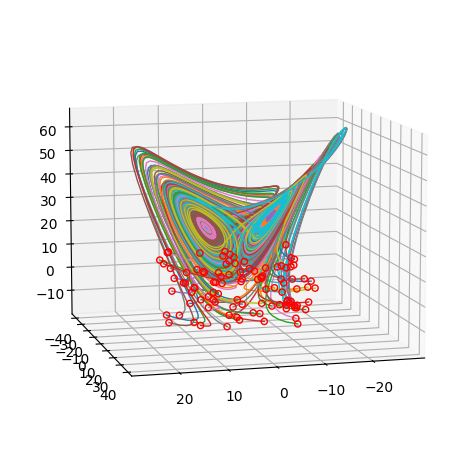

In [56]:
def ode(v,t, sigma, rho, beta):
    x,y,z = v
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

sigma = 10
rho = 28
beta = 8/3

dt = 0.01; T = 8
t = np.arange(0, T, dt)
N_trials = 100
store_sol = np.zeros(shape= (N_trials, len(t), 3))
store_init = np.zeros(shape= (N_trials, 3))
fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'),tight_layout=True)

for i in range(N_trials):
    v0_test = 30*(np.random.rand(3)-0.5)
    sol = odeint(ode, v0_test, t, args=(sigma, rho, beta))#,rtol=1e-10) 

    store_sol[i]    = sol
    store_init[i]   = v0_test

    ax.plot(*sol.T, lw = 1)
    ax.scatter(*v0_test, edgecolors='red', facecolor='none', zorder=2)

ax.view_init(elev=10, azim=75, roll=0)

dir = os.path.join('data_processing','media', 'Lorentz_system_sol')
descr = 'contents: 1) describtion; 2) solution; 3) initial conditons. in 2) 100 trials of lorentz ODE systems. each trial has x,y,z coordinates for times 0:8:0.01'
with open(dir, "wb") as f: # "wb" because we want to write in binary mode
    pickle.dump([descr,store_sol,store_init], f)